<a href="https://colab.research.google.com/github/divyakumar95/emotionAnalysis/blob/main/ML_CA_02_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine learning CA 02

###Question 02

Consider a continuous attribute in your dataset as the target variable, perform regression analysis using different ensemble methods, visualize and interpret the results

##Problem statement:

###Property price prediction in Ireland

##Dataset insights

###DataSources
* https://propertypriceregister.ie/
* https://www.kaggle.com/erinkhoo/property-price-register-ireland/download

##Programming

##Data Preprocessing

Mount drive to colab to use dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Dataset path

https://drive.google.com/file/d/1HQPdg4dmmeZz3OFR7d_NoZQc-B_x8zC0/view?usp=sharing

In [ ]:
import pandas as pd
dataset = '/content/drive/MyDrive/ML_Assignment_data/Property_Price_Register_Ireland-28-05-2021.csv'
data = pd.read_csv(dataset)
data['SALE_DATE'] = pd.to_datetime(data.SALE_DATE, format='%Y-%m-%d')
data.tail()

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC
476740,2021-05-28,"GRANGE STORES, GRANGE, MULLINGAR",NaN,Westmeath,150000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476741,2021-05-28,"MAIN STREET, LOWER BORRIS, BORRIS",NaN,Carlow,170000.0,1,0,Second-Hand Dwelling house /Apartment,NaN
476742,2021-05-28,"MULTYFARNHAM, WESTMEATH",NaN,Westmeath,175000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476743,2021-05-28,"NO 2 RIVERLODGE, SHRONE, GLENGARIFF",NaN,Cork,240000.0,0,0,Second-Hand Dwelling house /Apartment,NaN
476744,2021-05-28,"RABANE, KILL, COOTEHILL",NaN,Cavan,47000.0,0,0,Second-Hand Dwelling house /Apartment,NaN


##Data Preparation

###Drop Nan

In [ ]:
df = data.dropna(axis=0)
df.head()

,SALE_DATE,ADDRESS,POSTAL_CODE,COUNTY,SALE_PRICE,IF_MARKET_PRICE,IF_VAT_EXCLUDED,PROPERTY_DESC,PROPERTY_SIZE_DESC
47,2010-01-05,"134 longboat quay north, sir john rogersons quay",Dublin 2,Dublin,225000.00,0,1,New Dwelling house /Apartment,less than 38 sq metres
56,2010-01-05,"3 Myrtle Square, The Coast, Baldoyle",Dublin 13,Dublin,265198.00,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
170,2010-01-08,"4 Streamville Close, Donaghmeade, Dublin 13",Dublin 13,Dublin,221000.00,1,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
192,2010-01-08,"APT 8 1 GRANGE LODGE AVENUE, CLONGRIFFIN",Dublin 13,Dublin,177685.95,0,1,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
337,2010-01-14,"2 Belarmine Hall, Newtownlittle Stepaside, Du...",Dublin 18,Dublin,214097.00,0,1,New Dwelling house /Apartment,less than 38 sq metres


###Encode text data to numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

labelencoder = LabelEncoder()

df['PROPERTY_DESC'] = labelencoder.fit_transform(df['PROPERTY_DESC'])
df['COUNTY'] = labelencoder.fit_transform(df['COUNTY'])
df['POSTAL_CODE'] = labelencoder.fit_transform(df['POSTAL_CODE'])

###Input and Output

Assign the data to both X and y

* X - Input Features
* y - Continuous target variable

In [ ]:
df_features = ['IF_MARKET_PRICE','IF_VAT_EXCLUDED','PROPERTY_DESC','COUNTY','POSTAL_CODE']
X = df[df_features]
y = df.SALE_PRICE

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7952 entries, 47 to 427094
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   IF_MARKET_PRICE  7952 non-null   int64
 1   IF_VAT_EXCLUDED  7952 non-null   int64
 2   PROPERTY_DESC    7952 non-null   int64
 3   COUNTY           7952 non-null   int64
 4   POSTAL_CODE      7952 non-null   int64
dtypes: int64(5)
memory usage: 372.8 KB


In [ ]:
print('X:',len(X),'y: ',len(y))

X: 7952 y:  7952


##Modeling

###Imports

Import the required Machine learning libraries
* Regression models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR     # 4 kernel - ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
from sklearn.tree import DecisionTreeRegressor #criterion - “squared_error”, “friedman_mse”, “absolute_error”, “poisson”
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import StackingRegressor,BaggingRegressor,AdaBoostRegressor
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

###Define base model

In [ ]:
def base_models():
  models = dict()
  models['LR'] = LinearRegression()
  models['svc_Linear'] = SVR(kernel='linear')
  models['svc_Polly'] = SVR(kernel='poly')
  models['svc_RBF'] = SVR(kernel='rbf')
  models['svc_Sigmoid'] = SVR(kernel='sigmoid')
  models['dt_SQError'] = DecisionTreeRegressor(criterion='squared_error')
  models['dt_AbsError'] = DecisionTreeRegressor(criterion='absolute_error')
  models['dt_Posson'] = DecisionTreeRegressor(criterion='poisson')
  models['rf_SQError'] = RandomForestRegressor(n_estimators = 10, criterion='squared_error')
  models['rf_AbsError'] = RandomForestRegressor(n_estimators = 10, criterion='absolute_error')
  models['rf_Posson'] = RandomForestRegressor(n_estimators = 10, criterion='poisson')
  return models

###Define Model Evaluation

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import time

def evaluate_model_Multi(model, X, y, mc):
  RMSE = []
  MSE = []
  ABSErr = []
  single = time.time()
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=i)# split dataset
    #dt = make_pipeline(StandardScaler(),model)   #pipeline to reduce computation time
    dt = model.fit(X_train,y_train)               # fit the model
    YPred = dt.predict(X_test)                    # predict
    mse = mean_squared_error(y_test,YPred)
    abs = mean_absolute_error(y_test, YPred)
    rmse = sqrt(mse)
    MSE.append(mse)
    ABSErr.append(abs)
    RMSE.append(rmse)
    timed = time.time() - single
  return np.mean(ABSErr), np.mean(MSE), np.mean(RMSE)

###Train Model and get the RMSE Values of each Model 

In [ ]:
from numpy import mean, std
import warnings
warnings.filterwarnings("ignore")
# get the models to evaluate
models = base_models()
# evaluate the models and store results
Single_results, Single_names = list(), list()
Single_run = 1
start_single = time.time()
for name, model in models.items():
	AbsErr, Mse, Rmse = evaluate_model_Multi(model,X,y,Single_run) #,X_over,y_over)#, X, y)
	Single_results.append(Rmse)
	Single_names.append(name)
	#filename = 'Models/'+name+'.pkl'
	#pickle.dump(mod, open(filename, 'wb'))
	print(name,'- ABS Error:', mean(AbsErr), '- Mean sq Error:',mean(Mse),'- Root Mean Sq Error:', mean(Rmse))
print('------> Total time for single run to check models: ', time.time() - start_single) 

LR - ABS Error: 219485.62502314526 - Mean sq Error: 1249066753030.0725 - Root Mean Sq Error: 1117616.5500877628
svc_Linear - ABS Error: 185321.8789625904 - Mean sq Error: 1227014564054.7473 - Root Mean Sq Error: 1107706.8944692668
svc_Polly - ABS Error: 186024.0790604573 - Mean sq Error: 1227506700050.2812 - Root Mean Sq Error: 1107929.0139942546
svc_RBF - ABS Error: 186181.81264892372 - Mean sq Error: 1227896219443.3464 - Root Mean Sq Error: 1108104.787212539
svc_Sigmoid - ABS Error: 186189.28719454838 - Mean sq Error: 1227903964086.9233 - Root Mean Sq Error: 1108108.2817517985
dt_SQError - ABS Error: 208251.118092283 - Mean sq Error: 1372673337414.26 - Root Mean Sq Error: 1171611.4276560552
dt_AbsError - ABS Error: 159929.5625620874 - Mean sq Error: 1220425285855.5925 - Root Mean Sq Error: 1104728.6028050475
dt_Posson - ABS Error: 208251.118092283 - Mean sq Error: 1372673337414.26 - Root Mean Sq Error: 1171611.4276560552
rf_SQError - ABS Error: 195077.9290385168 - Mean sq Error: 1357

####Plot the Model Performace by RMSC Error rate

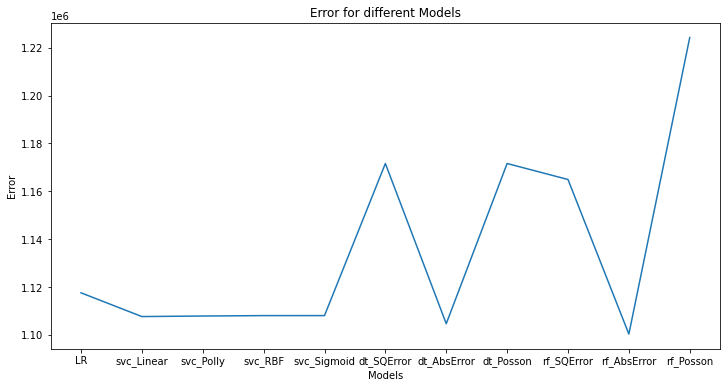

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Single_names,Single_results)
plt.ylabel('Error'); plt.xlabel('Models'); plt.title('Error for different Models');
plt.show()

##Find the Best Hyperparameters

###Evaluate with Different Train & Test Size

In [ ]:
import numpy as np

tsize = [0.2,0.3,0.4,0.5,0.6]
tsize_acc = {}
for i in tsize:
    err = []
    for j in range(20):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i, random_state = j)
        mod = DecisionTreeRegressor(criterion='absolute_error')
        mod.fit(X_train, y_train)
        mod_pred = mod.predict(X_test)
        mse = mean_squared_error(y_test,mod_pred)
        abs = mean_absolute_error(y_test, mod_pred)
        rmse = sqrt(mse)
        err.append(rmse)
    tsize_acc.update({i:np.mean(err)})
print(tsize_acc)

{0.2: 1468001.50674771, 0.3: 1405993.033187256, 0.4: 1366759.8188004575, 0.5: 1461738.3963036635, 0.6: 1484005.3266662904}


Plot the Performace by RMSC Error rate with different test sizes

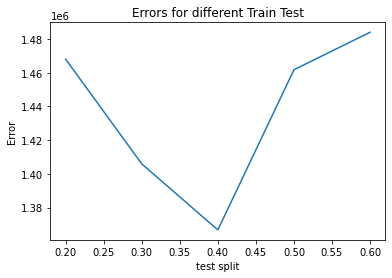

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(*zip(*sorted(tsize_acc.items())))
plt.ylabel('Error'); plt.xlabel('test split'); plt.title('Errors for different Train Test');
plt.show()

* ***According to the above results 0.4 test split ratio gives least error compared to other test splits.***

###Evaluate with Different N-Estimators for Random forest Regressor

In [ ]:
num_est = np.arange(10,150,10)
rf_clf_cv_mean = []
rf_clf_cv_std = []
err = []
for n_est in num_est:
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)
  mod = RandomForestRegressor(n_estimators = n_est, criterion='absolute_error')
  mod.fit(X_train, y_train)
  mod_pred = mod.predict(X_test)
  mse = mean_squared_error(y_test,mod_pred)
  abs = mean_absolute_error(y_test, mod_pred)
  rmse = sqrt(mse)
  err.append(rmse)
  rf_clf_cv_mean.append(np.mean(err))
  rf_clf_cv_std.append(np.std(err))

Plot the Performace by RMSC Error rate with different N Estimators

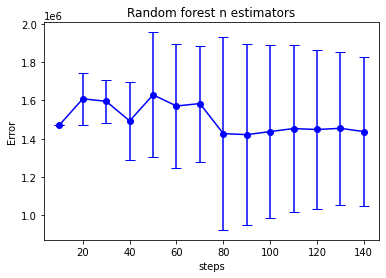

In [ ]:
plt.figure(figsize=(6, 4))
plt.errorbar(num_est, rf_clf_cv_mean, yerr=rf_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Error'); plt.xlabel('steps'); plt.title('Random forest n estimators');
plt.show()

* ***According to the graph 10 number of estimators gives less error with least variation.***

###Evaluate with Different N-Estimators for Ada boost Regressor

In [ ]:
num_est = np.arange(20,200,20)
ab_clf_cv_mean = []
ab_clf_cv_std = []
err_ab = []
for n_est in num_est:
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)
  rf = RandomForestRegressor(n_estimators = 10, criterion='absolute_error')
  mod = AdaBoostRegressor(base_estimator=rf, n_estimators=n_est)
  mod.fit(X_train, y_train)
  mod_pred = mod.predict(X_test)
  mse = mean_squared_error(y_test,mod_pred)
  abs = mean_absolute_error(y_test, mod_pred)
  rmse = sqrt(mse)
  err_ab.append(rmse)
  ab_clf_cv_mean.append(np.mean(err_ab))
  ab_clf_cv_std.append(np.std(err_ab))

Plot the Performace by RMSC Error rate with different N Estimators

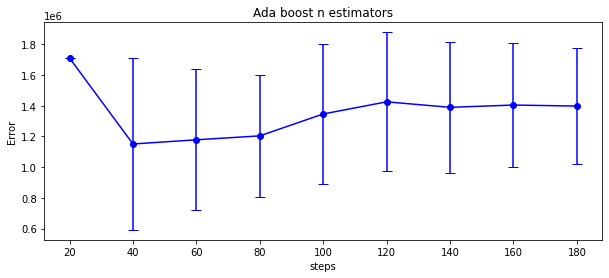

In [ ]:
plt.figure(figsize=(10, 4))
plt.errorbar(num_est, ab_clf_cv_mean, yerr=ab_clf_cv_std, c='blue', fmt='-o', capsize=5)
plt.ylabel('Error'); plt.xlabel('steps'); plt.title('Ada boost n estimators');
plt.show()

* ***According to the graph 20 number of estimators provide no deviation for error rate.***

##Ensemble Methods

* Using Decision tree, Random forest and , Support vector Linear Regressor as the base model due to better performance compared to other model from the Model Evaluation results

###Define Stacking model

In [ ]:
def get_stacking():
	# define the base models: level0 models
  level0 = list()
  level0.append(('DT', DecisionTreeRegressor(criterion='absolute_error')))
  level0.append(('Rand', RandomForestRegressor(n_estimators = 10, criterion='absolute_error')))
	# define meta learner model: level 1
  level1 = SVR(kernel='linear')
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

###Define Ensemble model 

In [ ]:
def ensemble_model():
  dt = DecisionTreeRegressor(criterion='absolute_error')             #Base model
  rf = RandomForestRegressor(n_estimators = 10, criterion='absolute_error')    #Base model
  models = dict()
  models['dt'] = DecisionTreeRegressor(criterion='absolute_error')
  models['rf'] = RandomForestRegressor(n_estimators = 10, criterion='absolute_error')
  models['bagging_dt'] = BaggingRegressor(base_estimator=dt, n_estimators=50)
  models['bagging_Rf'] = BaggingRegressor(base_estimator=rf, n_estimators=50)
  models['adaboost_dt'] = AdaBoostRegressor(base_estimator=dt, n_estimators=20)
  models['adaboost_RF'] = AdaBoostRegressor(base_estimator=rf, n_estimators=20)
  models['stacking'] = get_stacking()
  return models

###Model Evaluation 

In [ ]:
models = ensemble_model()
# evaluate the models and store results
ens_results, ens_names = list(), list()
Runs = 1
start_single = time.time()
for name, model in models.items():
	AbsErr, Mse, Rmse = evaluate_model_Multi(model,X,y,Runs)
	ens_results.append(Rmse)
	ens_names.append(name)
	#filename = 'Models/'+name+'.pkl'
	#pickle.dump(mod, open(filename, 'wb'))
	print(name,'- ABS Error:', mean(AbsErr), '- Mean sq Error:',mean(Mse),'- Root Mean Sq Error:', mean(Rmse))
print('---- > Total time for single run to check models: ', time.time() - start_single) 

dt - ABS Error: 159929.5625620874 - Mean sq Error: 1220425285855.5925 - Root Mean Sq Error: 1104728.6028050475
rf - ABS Error: 157860.7844564602 - Mean sq Error: 1210923026873.9827 - Root Mean Sq Error: 1100419.4776874783
bagging_dt - ABS Error: 158089.87916164726 - Mean sq Error: 1211167482601.0122 - Root Mean Sq Error: 1100530.5459645416
bagging_Rf - ABS Error: 160367.04255400816 - Mean sq Error: 1212052366035.9216 - Root Mean Sq Error: 1100932.498401206
adaboost_dt - ABS Error: 163617.03030022007 - Mean sq Error: 1213243449504.9521 - Root Mean Sq Error: 1101473.3085758148
adaboost_RF - ABS Error: 161026.67319034896 - Mean sq Error: 1212528172331.5808 - Root Mean Sq Error: 1101148.5695997523
stacking - ABS Error: 443987.1348566852 - Mean sq Error: 1669910592835.5996 - Root Mean Sq Error: 1292250.2051985133
---- > Total time for single run to check models:  224.2609384059906


Plot the Error to model performance graph

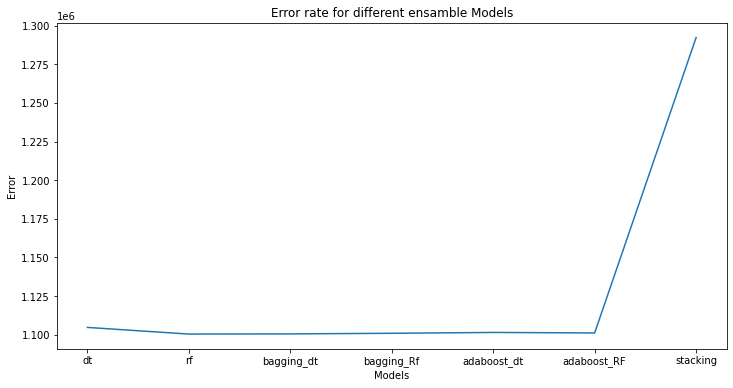

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ens_names,ens_results)
plt.ylabel('Error'); plt.xlabel('Models'); plt.title('Error rate for different ensamble Models');
plt.show()

* ***According to the above graph Random forest, bagging, boosting Decission tree Performed better compared to other models.***

##Result Interpretation

***If Selecting the best regression model Random forest regressor could be the best model due to less complexity and computation time***